In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv(r"C:\Users\user\Desktop\supply chain project\supply_chain_data.csv")

In [3]:
df.head(5)

,Product type,SKU,Price,Availability,Number of products sold,Revenue generated,Customer demographics,Stock levels,Lead times,Order quantities,...,Location,Lead time,Production volumes,Manufacturing lead time,Manufacturing costs,Inspection results,Defect rates,Transportation modes,Routes,Costs
0,haircare,SKU0,69.808006,55,802,8661.996792,Non-binary,58,7,96,...,Mumbai,29,215,29,46.279879,Pending,0.226410,Road,Route B,187.752075
1,skincare,SKU1,14.843523,95,736,7460.900065,Female,53,30,37,...,Mumbai,23,517,30,33.616769,Pending,4.854068,Road,Route B,503.065579
2,haircare,SKU2,11.319683,34,8,9577.749626,Unknown,1,10,88,...,Mumbai,12,971,27,30.688019,Pending,4.580593,Air,Route C,141.920282
3,skincare,SKU3,61.163343,68,83,7766.836426,Non-binary,23,13,59,...,Kolkata,24,937,18,35.624741,Fail,4.746649,Rail,Route A,254.776159
4,skincare,SKU4,4.805496,26,871,2686.505152,Non-binary,5,3,56,...,Delhi,5,414,3,92.065161,Fail,3.145580,Air,Route A,923.440632


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Product type             100 non-null    object 
 1   SKU                      100 non-null    object 
 2   Price                    100 non-null    float64
 3   Availability             100 non-null    int64  
 4   Number of products sold  100 non-null    int64  
 5   Revenue generated        100 non-null    float64
 6   Customer demographics    100 non-null    object 
 7   Stock levels             100 non-null    int64  
 8   Lead times               100 non-null    int64  
 9   Order quantities         100 non-null    int64  
 10  Shipping times           100 non-null    int64  
 11  Shipping carriers        100 non-null    object 
 12  Shipping costs           100 non-null    float64
 13  Supplier name            100 non-null    object 
 14  Location                 10

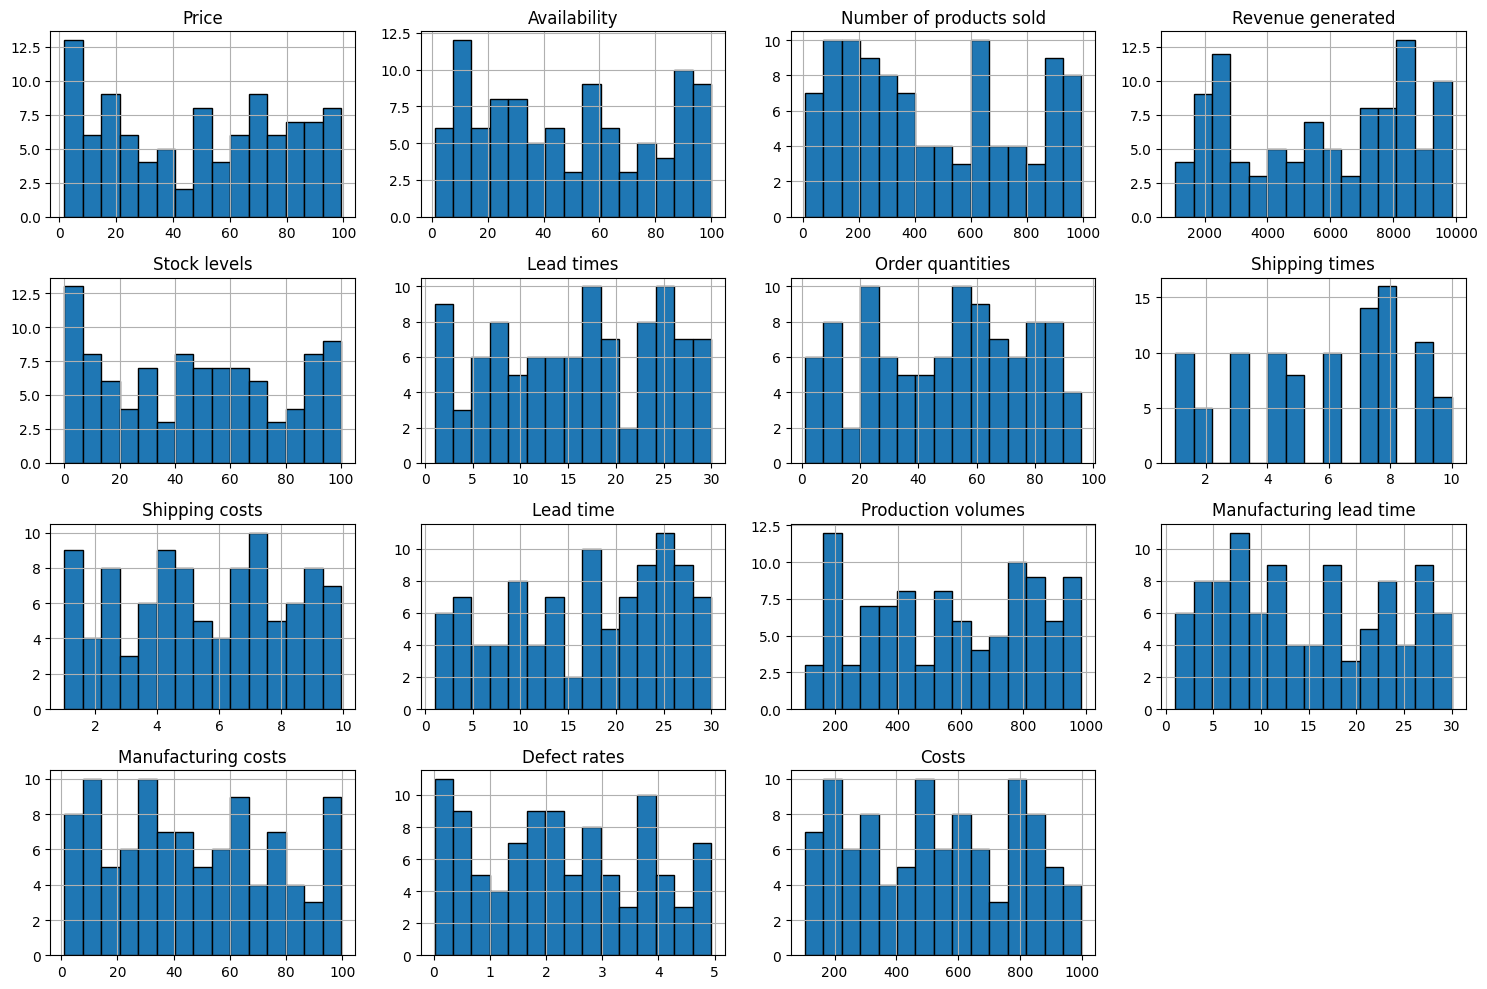

In [5]:
figsize=(12,8)
df.hist(figsize=(15,10),
       bins=15,
       edgecolor='black'
)
plt.tight_layout()

In [6]:
#we now want to begin doing our models
from sklearn.cluster import KMeans
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.pipeline import Pipeline
import joblib

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Product type             100 non-null    object 
 1   SKU                      100 non-null    object 
 2   Price                    100 non-null    float64
 3   Availability             100 non-null    int64  
 4   Number of products sold  100 non-null    int64  
 5   Revenue generated        100 non-null    float64
 6   Customer demographics    100 non-null    object 
 7   Stock levels             100 non-null    int64  
 8   Lead times               100 non-null    int64  
 9   Order quantities         100 non-null    int64  
 10  Shipping times           100 non-null    int64  
 11  Shipping carriers        100 non-null    object 
 12  Shipping costs           100 non-null    float64
 13  Supplier name            100 non-null    object 
 14  Location                 10

In [8]:
numerics=['Price','Availability','Number of products sold','Revenue generated']

In [9]:
cats=['Product type','Customer demographics']

In [10]:
x=df[numerics+cats]

In [11]:
x.head(2)

,Price,Availability,Number of products sold,Revenue generated,Product type,Customer demographics
0,69.808006,55,802,8661.996792,haircare,Non-binary
1,14.843523,95,736,7460.900065,skincare,Female


In [12]:
x2=x.copy()

In [13]:
#one hot encoding 
x2=pd.get_dummies(x2,columns=['Product type','Customer demographics'],drop_first=True)

In [14]:
x2.head()

,Price,Availability,Number of products sold,Revenue generated,Product type_haircare,Product type_skincare,Customer demographics_Male,Customer demographics_Non-binary,Customer demographics_Unknown
0,69.808006,55,802,8661.996792,True,False,False,True,False
1,14.843523,95,736,7460.900065,False,True,False,False,False
2,11.319683,34,8,9577.749626,True,False,False,False,True
3,61.163343,68,83,7766.836426,False,True,False,True,False
4,4.805496,26,871,2686.505152,False,True,False,True,False


In [15]:
x2.astype(float)

,Price,Availability,Number of products sold,Revenue generated,Product type_haircare,Product type_skincare,Customer demographics_Male,Customer demographics_Non-binary,Customer demographics_Unknown
0,69.808006,55.0,802.0,8661.996792,1.0,0.0,0.0,1.0,0.0
1,14.843523,95.0,736.0,7460.900065,0.0,1.0,0.0,0.0,0.0
2,11.319683,34.0,8.0,9577.749626,1.0,0.0,0.0,0.0,1.0
3,61.163343,68.0,83.0,7766.836426,0.0,1.0,0.0,1.0,0.0
4,4.805496,26.0,871.0,2686.505152,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...
95,77.903927,65.0,672.0,7386.363944,1.0,0.0,0.0,0.0,1.0
96,24.423131,29.0,324.0,7698.424766,0.0,0.0,0.0,1.0,0.0
97,3.526111,56.0,62.0,4370.916580,1.0,0.0,1.0,0.0,0.0
98,19.754605,43.0,913.0,8525.952560,0.0,1.0,0.0,0.0,0.0


In [16]:
x2=x2.astype(float)

In [17]:
#scaing the numerical columns
scaler=StandardScaler()

In [18]:
scaler.fit_transform(x2[['Price','Availability','Number of products sold','Revenue generated']])

array([[ 0.65605476,  0.21576233,  1.12821075,  1.06134484],
       [-1.11630925,  1.52341281,  0.90985378,  0.61962602],
       [-1.22993767, -0.47075417, -1.49868974,  1.39812476],
       [ 0.37730223,  0.64074873, -1.25055682,  0.73213806],
       [-1.4399917 , -0.73228427,  1.35649304, -1.13621932],
       [-1.54013113,  1.26188271, -1.03881673, -1.08405451],
       [-1.46343953, -0.0130765 , -1.31010872,  0.7529682 ],
       [-0.20972802,  0.34652738, -0.11576228,  1.00033556],
       [ 0.62089385,  0.96766135, -1.02889142,  0.64039107],
       [ 0.46927932, -0.43806291,  1.71711288, -0.29601317],
       [-1.08844025, -1.2226532 ,  1.7700479 , -1.2669735 ],
       [ 1.32764902,  1.52341281,  1.6509441 ,  0.11911691],
       [ 0.70137223, -0.24191534, -0.41352178, -1.06736075],
       [-1.07384595, -1.41880077, -0.70135596, -0.63376941],
       [ 1.60289343, -0.73228427,  0.33418541,  1.05824612],
       [-0.40220664,  1.49072154,  0.0265006 , -0.12281861],
       [-1.35158465,  0.

In [19]:
x2[['Price','Availability','Number of products sold','Revenue generated']]=scaler.fit_transform(x2[['Price','Availability','Number of products sold','Revenue generated']])

In [20]:
x2

,Price,Availability,Number of products sold,Revenue generated,Product type_haircare,Product type_skincare,Customer demographics_Male,Customer demographics_Non-binary,Customer demographics_Unknown
0,0.656055,0.215762,1.128211,1.061345,1.0,0.0,0.0,1.0,0.0
1,-1.116309,1.523413,0.909854,0.619626,0.0,1.0,0.0,0.0,0.0
2,-1.229938,-0.470754,-1.498690,1.398125,1.0,0.0,0.0,0.0,1.0
3,0.377302,0.640749,-1.250557,0.732138,0.0,1.0,0.0,1.0,0.0
4,-1.439992,-0.732284,1.356493,-1.136219,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...
95,0.917113,0.542675,0.698114,0.592214,1.0,0.0,0.0,0.0,1.0
96,-0.807409,-0.634210,-0.453223,0.706979,0.0,0.0,0.0,1.0,0.0
97,-1.481246,0.248454,-1.320034,-0.516755,1.0,0.0,1.0,0.0,0.0
98,-0.957948,-0.176533,1.495447,1.011313,0.0,1.0,0.0,0.0,0.0


In [21]:
#we need to find for k
k_range=range(1,15)

In [22]:
inertia=[]

In [23]:
for k in k_range:
    kmeans=KMeans(n_clusters=k)
    kmeans.fit(x2)
    inertia.append(kmeans.inertia_)
    

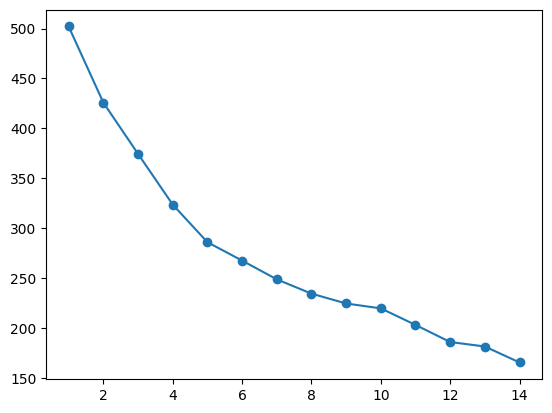

In [24]:
#plotting to find the n
plt.plot(k_range,inertia,marker='o')

In [25]:
x.head()

,Price,Availability,Number of products sold,Revenue generated,Product type,Customer demographics
0,69.808006,55,802,8661.996792,haircare,Non-binary
1,14.843523,95,736,7460.900065,skincare,Female
2,11.319683,34,8,9577.749626,haircare,Unknown
3,61.163343,68,83,7766.836426,skincare,Non-binary
4,4.805496,26,871,2686.505152,skincare,Non-binary


In [26]:
preprocessing=ColumnTransformer([
    ('ohe',OneHotEncoder(drop='first'),cats),
    ('std',StandardScaler(),numerics)
])

In [27]:
k_meanspipeline=Pipeline([
    ('preprocessing',preprocessing),
    ('kmeans',KMeans(n_clusters=4,random_state=42))
])
     

In [28]:
k_meanspipeline.fit(x)

,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('preprocessing', ...), ('kmeans', ...)]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"transformers transformers: list of tuplesList of (name, transformer, columns) tuples specifying thetransformer objects to be applied to subsets of the data.name : str Like in Pipeline and FeatureUnion, this allows the transformer and its parameters to be set using ``set_params`` and searched in grid search.transformer : {'drop', 'passthrough'} or estimator Estimator must support :term:`fit` and :term:`transform`. Special-cased strings 'drop' and 'passthrough' are accepted as well, to indicate to drop the columns or to pass them through untransformed, respectively.columns : str, array-like of str, int, array-like of int, array-like of bool, slice or callable Indexes the data on its second axis. Integers are interpreted as positional columns, while strings can reference DataFrame columns by name. A scalar string or int should be used where ``transformer`` expects X to be a 1d array-like (vector), otherwise a 2d array will be passed to the transformer. A callable is passed the input data `X` and can return any of the above. To select multiple columns by name or dtype, you can use :obj:`make_column_selector`.","[('ohe', ...), ('std', ...)]"
,"remainder remainder: {'drop', 'passthrough'} or estimator, default='drop'By default, only the specified columns in `transformers` aretransformed and combined in the output, and the non-specifiedcolumns are dropped. (default of ``'drop'``).By specifying ``remainder='passthrough'``, all remaining columns thatwere not specified in `transformers`, but present in the data passedto `fit` will be automatically passed through. This subset of columnsis concatenated with the output of the transformers. For dataframes,extra columns not seen during `fit` will be excluded from the outputof `transform`.By setting ``remainder`` to be an estimator, the remainingnon-specified columns will use the ``remainder`` estimator. Theestimator must support :term:`fit` and :term:`transform`.Note that using this feature requires that the DataFrame columnsinput at :term:`fit` and :term:`transform` have identical order.",'drop'
,"sparse_threshold sparse_threshold: float, default=0.3If the output of the different transformers 

In [29]:
clusters=k_meanspipeline.named_steps['kmeans'].labels_

In [30]:
clusters

array([1, 2, 1, 1, 0, 3, 2, 2, 1, 0, 0, 2, 3, 0, 1, 2, 2, 3, 1, 3, 1, 1,
       0, 1, 1, 3, 1, 3, 0, 1, 0, 1, 1, 3, 2, 1, 0, 0, 2, 0, 2, 1, 3, 0,
       0, 1, 3, 2, 1, 1, 2, 1, 1, 2, 0, 0, 2, 3, 3, 3, 1, 1, 3, 0, 1, 2,
       2, 1, 0, 3, 2, 0, 3, 1, 2, 3, 1, 0, 0, 1, 2, 0, 0, 3, 3, 1, 0, 1,
       1, 1, 2, 3, 3, 3, 2, 1, 1, 0, 2, 1], dtype=int32)

In [31]:
df['customer_classification']=clusters

In [32]:
df

,Product type,SKU,Price,Availability,Number of products sold,Revenue generated,Customer demographics,Stock levels,Lead times,Order quantities,...,Lead time,Production volumes,Manufacturing lead time,Manufacturing costs,Inspection results,Defect rates,Transportation modes,Routes,Costs,customer_classification
0,haircare,SKU0,69.808006,55,802,8661.996792,Non-binary,58,7,96,...,29,215,29,46.279879,Pending,0.226410,Road,Route B,187.752075,1
1,skincare,SKU1,14.843523,95,736,7460.900065,Female,53,30,37,...,23,517,30,33.616769,Pending,4.854068,Road,Route B,503.065579,2
2,haircare,SKU2,11.319683,34,8,9577.749626,Unknown,1,10,88,...,12,971,27,30.688019,Pending,4.580593,Air,Route C,141.920282,1
3,skincare,SKU3,61.163343,68,83,7766.836426,Non-binary,23,13,59,...,24,937,18,35.624741,Fail,4.746649,Rail,Route A,254.776159,1
4,skincare,SKU4,4.805496,26,871,2686.505152,Non-binary,5,3,56,...,5,414,3,92.065161,Fail,3.145580,Air,Route A,923.440632,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,haircare,SKU95,77.903927,65,672,7386.363944,Unknown,15,14,26,...,18,450,26,58.890686,Pending,1.210882,Air,Route A,778.864241,1
96,cosmetics,SKU96,24.423131,29,324,7698.424766,Non-binary,67,2,32,...,28,648,28,17.803756,Pending,3.872048,Road,Route A,188.742141,1
97,haircare,SKU97,3.526111,56,62,4370.916580,Male,46,19,4,...,10,535,13,65.765156,Fail,3.376238,Road,Route A,540.132423,0
98,skincare,SKU98,19.754605,43,913,8525.952560,Female,53,1,27,...,28,581,9,5.604691,Pending,2.908122,Rail,Route A,882.198864,2


In [33]:
df.groupby('customer_classification')['Revenue generated'].mean()

customer_classification
0    3992.846639
1    7892.178565
2    7445.750595
3    2532.492084
Name: Revenue generated, dtype: float64

In [34]:
mapp={
    0: 'Mid-tier Customer',
    1: 'Highest Value Customer',
    2: 'High Value Customer',
    3: 'Low Value Customer'
}

In [35]:
df['customer_classification'].replace(mapp)

0     Highest Value Customer
1        High Value Customer
2     Highest Value Customer
3     Highest Value Customer
4          Mid-tier Customer
               ...          
95    Highest Value Customer
96    Highest Value Customer
97         Mid-tier Customer
98       High Value Customer
99    Highest Value Customer
Name: customer_classification, Length: 100, dtype: object

In [36]:
df['customer_classification']=df['customer_classification'].replace(mapp)

In [37]:
df

,Product type,SKU,Price,Availability,Number of products sold,Revenue generated,Customer demographics,Stock levels,Lead times,Order quantities,...,Lead time,Production volumes,Manufacturing lead time,Manufacturing costs,Inspection results,Defect rates,Transportation modes,Routes,Costs,customer_classification
0,haircare,SKU0,69.808006,55,802,8661.996792,Non-binary,58,7,96,...,29,215,29,46.279879,Pending,0.226410,Road,Route B,187.752075,Highest Value Customer
1,skincare,SKU1,14.843523,95,736,7460.900065,Female,53,30,37,...,23,517,30,33.616769,Pending,4.854068,Road,Route B,503.065579,High Value Customer
2,haircare,SKU2,11.319683,34,8,9577.749626,Unknown,1,10,88,...,12,971,27,30.688019,Pending,4.580593,Air,Route C,141.920282,Highest Value Customer
3,skincare,SKU3,61.163343,68,83,7766.836426,Non-binary,23,13,59,...,24,937,18,35.624741,Fail,4.746649,Rail,Route A,254.776159,Highest Value Customer
4,skincare,SKU4,4.805496,26,871,2686.505152,Non-binary,5,3,56,...,5,414,3,92.065161,Fail,3.145580,Air,Route A,923.440632,Mid-tier Customer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,haircare,SKU95,77.903927,65,672,7386.363944,Unknown,15,14,26,...,18,450,26,58.890686,Pending,1.210882,Air,Route A,778.864241,Highest Value Customer
96,cosmetics,SKU96,24.423131,29,324,7698.424766,Non-binary,67,2,32,...,28,648,28,17.803756,Pending,3.872048,Road,Route A,188.742141,Highest Value Customer
97,haircare,SKU97,3.526111,56,62,4370.916580,Male,46,19,4,...,10,535,13,65.765156,Fail,3.376238,Road,Route A,540.132423,Mid-tier Customer
98,skincare,SKU98,19.754605,43,913,8525.952560,Female,53,1,27,...,28,581,9,5.604691,Pending,2.908122,Rail,Route A,882.198864,High Value Customer


In [39]:
joblib.dump(k_meanspipeline,'kmeansclusters.pkl')

['kmeansclusters.pkl']

In [40]:
df

,Product type,SKU,Price,Availability,Number of products sold,Revenue generated,Customer demographics,Stock levels,Lead times,Order quantities,...,Lead time,Production volumes,Manufacturing lead time,Manufacturing costs,Inspection results,Defect rates,Transportation modes,Routes,Costs,customer_classification
0,haircare,SKU0,69.808006,55,802,8661.996792,Non-binary,58,7,96,...,29,215,29,46.279879,Pending,0.226410,Road,Route B,187.752075,Highest Value Customer
1,skincare,SKU1,14.843523,95,736,7460.900065,Female,53,30,37,...,23,517,30,33.616769,Pending,4.854068,Road,Route B,503.065579,High Value Customer
2,haircare,SKU2,11.319683,34,8,9577.749626,Unknown,1,10,88,...,12,971,27,30.688019,Pending,4.580593,Air,Route C,141.920282,Highest Value Customer
3,skincare,SKU3,61.163343,68,83,7766.836426,Non-binary,23,13,59,...,24,937,18,35.624741,Fail,4.746649,Rail,Route A,254.776159,Highest Value Customer
4,skincare,SKU4,4.805496,26,871,2686.505152,Non-binary,5,3,56,...,5,414,3,92.065161,Fail,3.145580,Air,Route A,923.440632,Mid-tier Customer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,haircare,SKU95,77.903927,65,672,7386.363944,Unknown,15,14,26,...,18,450,26,58.890686,Pending,1.210882,Air,Route A,778.864241,Highest Value Customer
96,cosmetics,SKU96,24.423131,29,324,7698.424766,Non-binary,67,2,32,...,28,648,28,17.803756,Pending,3.872048,Road,Route A,188.742141,Highest Value Customer
97,haircare,SKU97,3.526111,56,62,4370.916580,Male,46,19,4,...,10,535,13,65.765156,Fail,3.376238,Road,Route A,540.132423,Mid-tier Customer
98,skincare,SKU98,19.754605,43,913,8525.952560,Female,53,1,27,...,28,581,9,5.604691,Pending,2.908122,Rail,Route A,882.198864,High Value Customer


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Product type             100 non-null    object 
 1   SKU                      100 non-null    object 
 2   Price                    100 non-null    float64
 3   Availability             100 non-null    int64  
 4   Number of products sold  100 non-null    int64  
 5   Revenue generated        100 non-null    float64
 6   Customer demographics    100 non-null    object 
 7   Stock levels             100 non-null    int64  
 8   Lead times               100 non-null    int64  
 9   Order quantities         100 non-null    int64  
 10  Shipping times           100 non-null    int64  
 11  Shipping carriers        100 non-null    object 
 12  Shipping costs           100 non-null    float64
 13  Supplier name            100 non-null    object 
 14  Location                 10

In [179]:
#from above we can build a regression model to predict our pricing or revenue generated
from sklearn.model_selection import train_test_split,KFold,cross_val_score
from sklearn.pipeline import FeatureUnion
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest,f_regression,f_classif
from sklearn import linear_model

In [43]:
#defining our features
df.head(2)

,Product type,SKU,Price,Availability,Number of products sold,Revenue generated,Customer demographics,Stock levels,Lead times,Order quantities,...,Lead time,Production volumes,Manufacturing lead time,Manufacturing costs,Inspection results,Defect rates,Transportation modes,Routes,Costs,customer_classification
0,haircare,SKU0,69.808006,55,802,8661.996792,Non-binary,58,7,96,...,29,215,29,46.279879,Pending,0.226410,Road,Route B,187.752075,Highest Value Customer
1,skincare,SKU1,14.843523,95,736,7460.900065,Female,53,30,37,...,23,517,30,33.616769,Pending,4.854068,Road,Route B,503.065579,High Value Customer


In [44]:
table1=df[['Product type','Price','Availability','Number of products sold','Customer demographics','customer_classification','Revenue generated']]

In [45]:
table1

,Product type,Price,Availability,Number of products sold,Customer demographics,customer_classification,Revenue generated
0,haircare,69.808006,55,802,Non-binary,Highest Value Customer,8661.996792
1,skincare,14.843523,95,736,Female,High Value Customer,7460.900065
2,haircare,11.319683,34,8,Unknown,Highest Value Customer,9577.749626
3,skincare,61.163343,68,83,Non-binary,Highest Value Customer,7766.836426
4,skincare,4.805496,26,871,Non-binary,Mid-tier Customer,2686.505152
...,...,...,...,...,...,...,...
95,haircare,77.903927,65,672,Unknown,Highest Value Customer,7386.363944
96,cosmetics,24.423131,29,324,Non-binary,Highest Value Customer,7698.424766
97,haircare,3.526111,56,62,Male,Mid-tier Customer,4370.916580
98,skincare,19.754605,43,913,Female,High Value Customer,8525.952560


In [46]:
y=table1['Revenue generated']

In [47]:
numbs=['Price','Availability','Number of products sold']

In [48]:
catts=['Product type','Customer demographics','customer_classification']

In [49]:
x=table1[numbs+catts]

In [50]:
x.head(2)

,Price,Availability,Number of products sold,Product type,Customer demographics,customer_classification
0,69.808006,55,802,haircare,Non-binary,Highest Value Customer
1,14.843523,95,736,skincare,Female,High Value Customer


In [51]:
#train and spit the data
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.3,random_state=42)

In [52]:
preprocess=ColumnTransformer([
    ('oht',OneHotEncoder(drop='first'),catts),
    ('std',StandardScaler(),numbs)
])

In [53]:
features=FeatureUnion([
    ('skt',SelectKBest(score_func=f_regression)),
    ('pca',PCA())
])

In [54]:
#define our models
lrgr=linear_model.LinearRegression()

In [55]:
price_pipeline=Pipeline([
    ('preprocess',preprocess),
    ('features',features),
    ('lrgr',lrgr)
])

In [58]:
#cross_validation
kf=KFold(n_splits=5,shuffle=True)
scores=cross_val_score(price_pipeline,train_x,train_y,cv=kf)
print(scores.mean())

0.6578413020167605


In [59]:
price_pipeline.fit(train_x,train_y)

,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('preprocess', ...), ('features', ...), ...]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"transformers transformers: list of tuplesList of (name, transformer, columns) tuples specifying thetransformer objects to be applied to subsets of the data.name : str Like in Pipeline and FeatureUnion, this allows the transformer and its parameters to be set using ``set_params`` and searched in grid search.transformer : {'drop', 'passthrough'} or estimator Estimator must support :term:`fit` and :term:`transform`. Special-cased strings 'drop' and 'passthrough' are accepted as well, to indicate to drop the columns or to pass them through untransformed, respectively.columns : str, array-like of str, int, array-like of int, array-like of bool, slice or callable Indexes the data on its second axis. Integers are interpreted as positional columns, while strings can reference DataFrame columns by name. A scalar string or int should be used where ``transformer`` expects X to be a 1d array-like (vector), otherwise a 2d array will be passed to the transformer. A callable is passed the input data `X` and can return any of the above. To select multiple columns by name or dtype, you can use :obj:`make_column_selector`.","[('oht', ...), ('std', ...)]"
,"remainder remainder: {'drop', 'passthrough'} or estimator, default='drop'By default, only the specified columns in `transformers` aretransformed and combined in the output, and the non-specifiedcolumns are dropped. (default of ``'drop'``).By specifying ``remainder='passthrough'``, all remaining columns thatwere not specified in `transformers`, but present in the data passedto `fit` will be automatically passed through. This subset of columnsis concatenated with the output of the transformers. For dataframes,extra columns not seen during `fit` will be excluded from the outputof `transform`.By setting ``remainder`` to be an estimator, the remainingnon-specified columns will use the ``remainder`` estimator. Theestimator must support :term:`fit` and :term:`transform`.Note that using this feature requires that the DataFrame columnsinput at :term:`fit` and :term:`transform` have identical order.",'drop'
,"sparse_threshold sparse_threshold: float, default=0.3If the output of the different transform

In [60]:
price_pred=price_pipeline.predict(test_x)

In [61]:
predicted=test_x.copy()

In [62]:
predicted['price_predicted']=price_pred

In [63]:
predicted

,Price,Availability,Number of products sold,Product type,Customer demographics,customer_classification,price_predicted
83,68.911246,82,663,haircare,Unknown,Low Value Customer,2314.947599
53,30.341471,93,242,skincare,Male,High Value Customer,7196.158182
70,47.914542,90,32,haircare,Female,High Value Customer,6550.967812
45,33.784138,1,24,haircare,Male,Highest Value Customer,8195.977333
44,51.355791,34,919,cosmetics,Female,Mid-tier Customer,4587.526705
39,19.127477,26,176,skincare,Female,Mid-tier Customer,4203.790634
22,27.679781,55,884,haircare,Unknown,Mid-tier Customer,4423.284633
80,91.128318,75,872,skincare,Unknown,High Value Customer,6899.613389
10,15.707796,11,996,skincare,Non-binary,Mid-tier Customer,4838.248164
0,69.808006,55,802,haircare,Non-binary,Highest Value Customer,8059.473087


In [64]:
joblib.dump(price_pipeline,'revenue_prediction.pkl')

['revenue_prediction.pkl']

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Product type             100 non-null    object 
 1   SKU                      100 non-null    object 
 2   Price                    100 non-null    float64
 3   Availability             100 non-null    int64  
 4   Number of products sold  100 non-null    int64  
 5   Revenue generated        100 non-null    float64
 6   Customer demographics    100 non-null    object 
 7   Stock levels             100 non-null    int64  
 8   Lead times               100 non-null    int64  
 9   Order quantities         100 non-null    int64  
 10  Shipping times           100 non-null    int64  
 11  Shipping carriers        100 non-null    object 
 12  Shipping costs           100 non-null    float64
 13  Supplier name            100 non-null    object 
 14  Location                 10

In [242]:
pd.set_option('display.max_columns',30)

In [243]:
df.head(2)

,Product type,SKU,Price,Availability,Number of products sold,Revenue generated,Customer demographics,Stock levels,Lead times,Order quantities,Shipping times,Shipping carriers,Shipping costs,Supplier name,Location,Lead time,Production volumes,Manufacturing lead time,Manufacturing costs,Inspection results,Defect rates,Transportation modes,Routes,Costs,customer_classification
0,haircare,SKU0,69.808006,55,802,8661.996792,Non-binary,58,7,96,4,Carrier B,2.956572,Supplier 3,Mumbai,29,215,29,46.279879,Pending,0.226410,Road,Route B,187.752075,Highest Value Customer
1,skincare,SKU1,14.843523,95,736,7460.900065,Female,53,30,37,2,Carrier A,9.716575,Supplier 3,Mumbai,23,517,30,33.616769,Pending,4.854068,Road,Route B,503.065579,High Value Customer


In [244]:
#2nd regression mdel we will build is using shipping costs
table2=df[['Transportation modes','Routes','Shipping carriers','Shipping times','Order quantities','Costs']]

In [245]:
table2.head(3)

,Transportation modes,Routes,Shipping carriers,Shipping times,Order quantities,Costs
0,Road,Route B,Carrier B,4,96,187.752075
1,Road,Route B,Carrier A,2,37,503.065579
2,Air,Route C,Carrier B,2,88,141.920282


In [246]:
y=table2['Costs']

In [247]:
categs=['Transportation modes','Routes','Shipping carriers']

In [248]:
nums=['Shipping times','Order quantities']

In [249]:
x=table2[categs+nums]

In [250]:
x.head(2)

,Transportation modes,Routes,Shipping carriers,Shipping times,Order quantities
0,Road,Route B,Carrier B,4,96
1,Road,Route B,Carrier A,2,37


In [251]:
#we train test and split
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.3,random_state=42)

In [252]:
preprocessing=ColumnTransformer([
    ('oht',OneHotEncoder(drop='first'),categs),
    ('std',StandardScaler(),nums)
])

In [253]:
features=FeatureUnion([
    ('pca',PCA()),
    ('skt',SelectKBest(score_func=f_regression,k=2))
])

In [254]:
rgr=linear_model.LinearRegression()

In [255]:
costs_pipeline=Pipeline([
    ('preprocessing',preprocessing),
    ('features',features),
    ('rgr',rgr)
])

In [256]:
#cross_validation
kf=KFold(n_splits=2,shuffle=True)
score=cross_val_score(costs_pipeline,train_x,train_y,cv=kf)
print(score.mean())

-0.9070404308474181


In [257]:
costs_pipeline.fit(train_x,train_y)

,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('preprocessing', ...), ('features', ...), ...]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"transformers transformers: list of tuplesList of (name, transformer, columns) tuples specifying thetransformer objects to be applied to subsets of the data.name : str Like in Pipeline and FeatureUnion, this allows the transformer and its parameters to be set using ``set_params`` and searched in grid search.transformer : {'drop', 'passthrough'} or estimator Estimator must support :term:`fit` and :term:`transform`. Special-cased strings 'drop' and 'passthrough' are accepted as well, to indicate to drop the columns or to pass them through untransformed, respectively.columns : str, array-like of str, int, array-like of int, array-like of bool, slice or callable Indexes the data on its second axis. Integers are interpreted as positional columns, while strings can reference DataFrame columns by name. A scalar string or int should be used where ``transformer`` expects X to be a 1d array-like (vector), otherwise a 2d array will be passed to the transformer. A callable is passed the input data `X` and can return any of the above. To select multiple columns by name or dtype, you can use :obj:`make_column_selector`.","[('oht', ...), ('std', ...)]"
,"remainder remainder: {'drop', 'passthrough'} or estimator, default='drop'By default, only the specified columns in `transformers` aretransformed and combined in the output, and the non-specifiedcolumns are dropped. (default of ``'drop'``).By specifying ``remainder='passthrough'``, all remaining columns thatwere not specified in `transformers`, but present in the data passedto `fit` will be automatically passed through. This subset of columnsis concatenated with the output of the transformers. For dataframes,extra columns not seen during `fit` will be excluded from the outputof `transform`.By setting ``remainder`` to be an estimator, the remainingnon-specified columns will use the ``remainder`` estimator. Theestimator must support :term:`fit` and :term:`transform`.Note that using this feature requires that the DataFrame columnsinput at :term:`fit` and :term:`transform` have identical order.",'drop'
,"sparse_threshold sparse_threshold: float, default=0.3If the output of the different transf

In [258]:
preds=costs_pipeline.predict(test_x)

In [259]:
preds

array([469.03332949, 620.69401474, 497.69155553, 433.78094054,
       521.92643073, 524.9837445 , 387.87194259, 552.9616145 ,
       735.40752264, 694.03433951, 449.92727525, 514.6953797 ,
       545.37423268, 513.50351973, 600.69135439, 443.93916086,
       325.30601159, 643.47261219, 609.9921602 , 432.72065538,
       382.22031461, 368.44145233, 428.49517897, 595.87256933,
       475.87329986, 527.29580099, 572.73627424, 563.41123397,
       513.75643586, 506.37748208])

In [260]:
costs_prediction=test_x.copy()

In [261]:
costs_prediction['pricing']=preds

In [262]:
costs_prediction.head(20)

,Transportation modes,Routes,Shipping carriers,Shipping times,Order quantities,pricing
83,Road,Route A,Carrier B,8,7,469.033329
53,Air,Route B,Carrier B,3,54,620.694015
70,Road,Route C,Carrier B,4,22,497.691556
45,Rail,Route A,Carrier B,6,52,433.780941
44,Rail,Route A,Carrier C,6,72,521.926431
39,Air,Route B,Carrier A,3,34,524.983745
22,Rail,Route C,Carrier A,10,63,387.871943
80,Sea,Route B,Carrier C,2,41,552.961614
10,Road,Route B,Carrier C,2,80,735.407523
0,Road,Route B,Carrier B,4,96,694.034340


In [263]:
joblib.dump(costs_pipeline,'shipping_costs.pkl')

['shipping_costs.pkl']

In [264]:
df.head()

,Product type,SKU,Price,Availability,Number of products sold,Revenue generated,Customer demographics,Stock levels,Lead times,Order quantities,Shipping times,Shipping carriers,Shipping costs,Supplier name,Location,Lead time,Production volumes,Manufacturing lead time,Manufacturing costs,Inspection results,Defect rates,Transportation modes,Routes,Costs,customer_classification
0,haircare,SKU0,69.808006,55,802,8661.996792,Non-binary,58,7,96,4,Carrier B,2.956572,Supplier 3,Mumbai,29,215,29,46.279879,Pending,0.226410,Road,Route B,187.752075,Highest Value Customer
1,skincare,SKU1,14.843523,95,736,7460.900065,Female,53,30,37,2,Carrier A,9.716575,Supplier 3,Mumbai,23,517,30,33.616769,Pending,4.854068,Road,Route B,503.065579,High Value Customer
2,haircare,SKU2,11.319683,34,8,9577.749626,Unknown,1,10,88,2,Carrier B,8.054479,Supplier 1,Mumbai,12,971,27,30.688019,Pending,4.580593,Air,Route C,141.920282,Highest Value Customer
3,skincare,SKU3,61.163343,68,83,7766.836426,Non-binary,23,13,59,6,Carrier C,1.729569,Supplier 5,Kolkata,24,937,18,35.624741,Fail,4.746649,Rail,Route A,254.776159,Highest Value Customer
4,skincare,SKU4,4.805496,26,871,2686.505152,Non-binary,5,3,56,8,Carrier A,3.890548,Supplier 1,Delhi,5,414,3,92.065161,Fail,3.145580,Air,Route A,923.440632,Mid-tier Customer


In [265]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Product type             100 non-null    object 
 1   SKU                      100 non-null    object 
 2   Price                    100 non-null    float64
 3   Availability             100 non-null    int64  
 4   Number of products sold  100 non-null    int64  
 5   Revenue generated        100 non-null    float64
 6   Customer demographics    100 non-null    object 
 7   Stock levels             100 non-null    int64  
 8   Lead times               100 non-null    int64  
 9   Order quantities         100 non-null    int64  
 10  Shipping times           100 non-null    int64  
 11  Shipping carriers        100 non-null    object 
 12  Shipping costs           100 non-null    float64
 13  Supplier name            100 non-null    object 
 14  Location                 10

In [266]:
#we now need to know and predict the inspection results depending on a few features
table3=df[['Supplier name','Defect rates','Production volumes','Inspection results','Manufacturing lead time','Manufacturing costs']]

In [267]:
correlation=df[['Defect rates','Production volumes','Manufacturing lead time','Manufacturing costs','Production volumes']]

In [268]:
cor=correlation.corr()

Text(0.5, 1.0, 'Correlation Matrix')

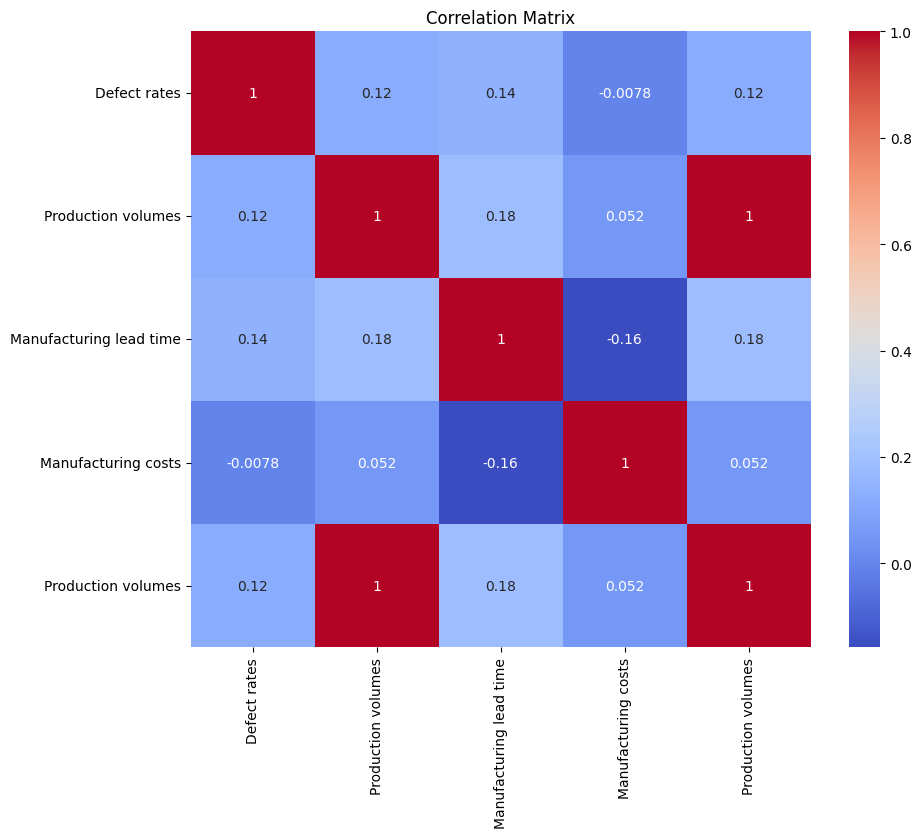

In [269]:
plt.figure(figsize=(10,8))
sns.heatmap(cor,annot=True,cmap='coolwarm')
plt.title("Correlation Matrix")           
           

In [270]:
#we know our columns are not greatly correlated 
#let us import our libraries that we need to do our classification
from sklearn.ensemble import VotingClassifier,RandomForestClassifier

In [271]:
table3.head(4)

,Supplier name,Defect rates,Production volumes,Inspection results,Manufacturing lead time,Manufacturing costs
0,Supplier 3,0.226410,215,Pending,29,46.279879
1,Supplier 3,4.854068,517,Pending,30,33.616769
2,Supplier 1,4.580593,971,Pending,27,30.688019
3,Supplier 5,4.746649,937,Fail,18,35.624741


In [272]:
lets=['Supplier name']

In [273]:
figs=['Defect rates','Production volumes','Manufacturing lead time','Manufacturing costs']

In [274]:
y=table3['Inspection results']

In [275]:
x=table3[lets+figs]

In [276]:
x.head()

,Supplier name,Defect rates,Production volumes,Manufacturing lead time,Manufacturing costs
0,Supplier 3,0.226410,215,29,46.279879
1,Supplier 3,4.854068,517,30,33.616769
2,Supplier 1,4.580593,971,27,30.688019
3,Supplier 5,4.746649,937,18,35.624741
4,Supplier 1,3.145580,414,3,92.065161


In [277]:
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.3,random_state=42)

In [278]:
preprocessing=ColumnTransformer([
    ('oht',OneHotEncoder(drop='first'),lets),
    ('std',StandardScaler(),figs)
])

In [279]:
features=FeatureUnion([
    ('skt',SelectKBest(score_func=f_classif,k=5)),
    ('pca',PCA())
])

In [280]:
#defining our models
log=linear_model.LogisticRegression()
rf=RandomForestClassifier()

In [281]:
ensemble=VotingClassifier(
    estimators=[('rf',rf),
                ('log',log)],
    voting='soft'
)

In [282]:
inspections=Pipeline([
    ('preprocessing',preprocessing),
    ('fetures',features),
    ('ensemble',ensemble)
])

In [283]:
kf=KFold(n_splits=5,shuffle=True)
scores=cross_val_score(inspections,train_x,train_y,cv=kf)
print(scores.mean())

0.42857142857142855


In [284]:
inspections.fit(train_x,train_y)

,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('preprocessing', ...), ('fetures', ...), ...]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"transformers transformers: list of tuplesList of (name, transformer, columns) tuples specifying thetransformer objects to be applied to subsets of the data.name : str Like in Pipeline and FeatureUnion, this allows the transformer and its parameters to be set using ``set_params`` and searched in grid search.transformer : {'drop', 'passthrough'} or estimator Estimator must support :term:`fit` and :term:`transform`. Special-cased strings 'drop' and 'passthrough' are accepted as well, to indicate to drop the columns or to pass them through untransformed, respectively.columns : str, array-like of str, int, array-like of int, array-like of bool, slice or callable Indexes the data on its second axis. Integers are interpreted as positional columns, while strings can reference DataFrame columns by name. A scalar string or int should be used where ``transformer`` expects X to be a 1d array-like (vector), otherwise a 2d array will be passed to the transformer. A callable is passed the input data `X` and can return any of the above. To select multiple columns by name or dtype, you can use :obj:`make_column_selector`.","[('oht', ...), ('std', ...)]"
,"remainder remainder: {'drop', 'passthrough'} or estimator, default='drop'By default, only the specified columns in `transformers` aretransformed and combined in the output, and the non-specifiedcolumns are dropped. (default of ``'drop'``).By specifying ``remainder='passthrough'``, all remaining columns thatwere not specified in `transformers`, but present in the data passedto `fit` will be automatically passed through. This subset of columnsis concatenated with the output of the transformers. For dataframes,extra columns not seen during `fit` will be excluded from the outputof `transform`.By setting ``remainder`` to be an estimator, the remainingnon-specified columns will use the ``remainder`` estimator. Theestimator must support :term:`fit` and :term:`transform`.Note that using this feature requires that the DataFrame columnsinput at :term:`fit` and :term:`transform` have identical order.",'drop'
,"sparse_threshold sparse_threshold: float, default=0.3If the output of the different transfo

In [286]:
insp_pred=inspections.predict(test_x)

In [287]:
new_x=test_x.copy()

In [ ]:
new_x['inspections_predict